## TASK - 03

## PRODIGY INFOTECH

##  Predicting Customer Purchases: A Decision Tree Approach

### Introduction:

In the ever-evolving landscape of marketing and sales, understanding customer behavior is paramount. By leveraging demographic and behavioral data, businesses can predict whether a customer will purchase a product or service. In this project, we aim to build a decision tree classifier to analyze customer data and forecast their purchasing decisions. Through exploratory data analysis (EDA) and model building, we seek to uncover insights that can inform targeted marketing strategies, optimize resource allocation, and ultimately enhance customer engagement and satisfaction.

### Objectives:

1. Perform comprehensive exploratory data analysis (EDA) to understand the structure of the dataset, identify patterns, and explore relationships between features and the target variable.
2. Preprocess the data, including handling missing values, encoding categorical variables, and splitting the dataset into training and testing sets.
3. Build and train a decision tree classifier using the training data to predict customer purchases based on demographic and behavioral attributes.
4. Evaluate the performance of the decision tree classifier on the testing data using relevant metrics such as accuracy, precision, recall, and F1-score.
5. Provide insights and recommendations based on the analysis to assist businesses in devising effective marketing strategies and improving customer acquisition and retention efforts.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
data = pd.read_csv("C:/Users/MANOJ S/OneDrive/Desktop/bank.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [5]:
# Display the first few rows of the dataset
print(data.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [6]:
# Summary statistics
print(data.describe())

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


In [7]:
# Check for missing values
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


C:\Users\MANOJ S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


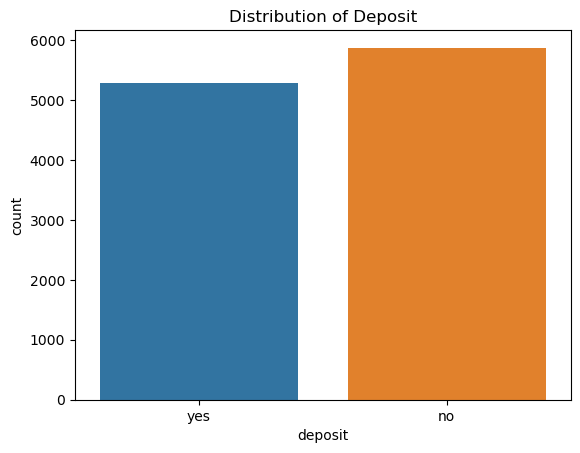

In [8]:
# Visualize the distribution of the target variable
sns.countplot(data['deposit'])
plt.title('Distribution of Deposit')
plt.show()

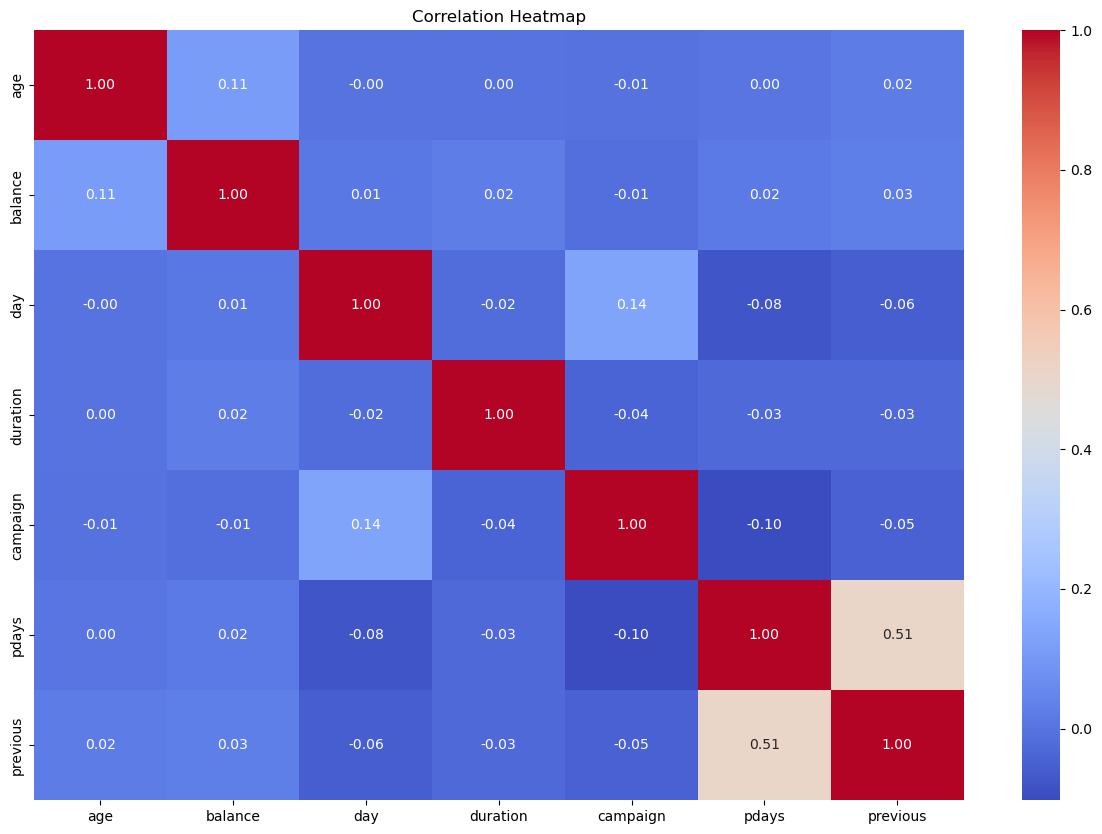

In [9]:
# Visualize relationships between features and the target variable
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

C:\Users\MANOJ S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


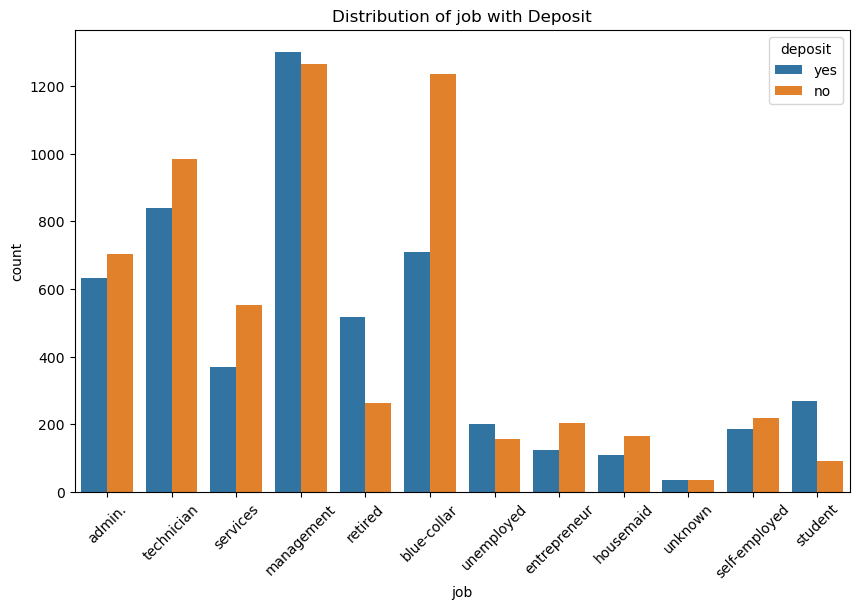

C:\Users\MANOJ S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


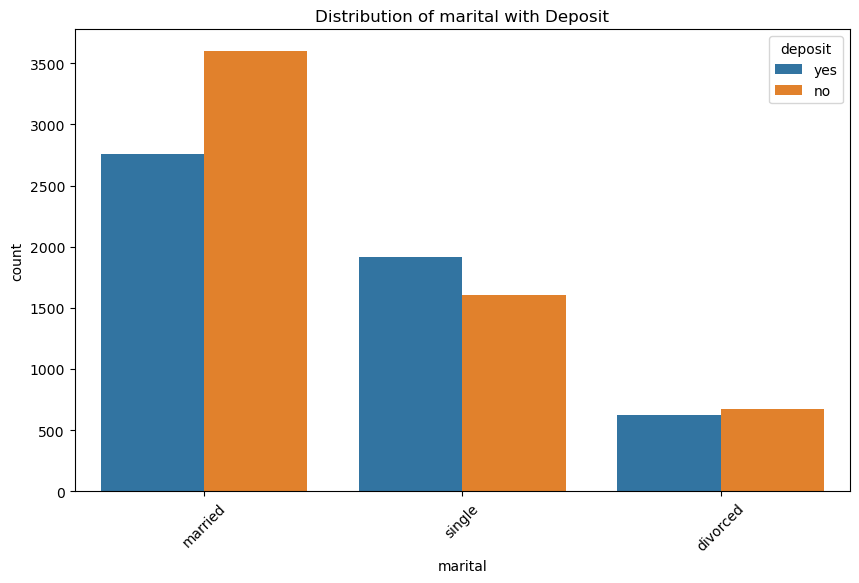

C:\Users\MANOJ S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


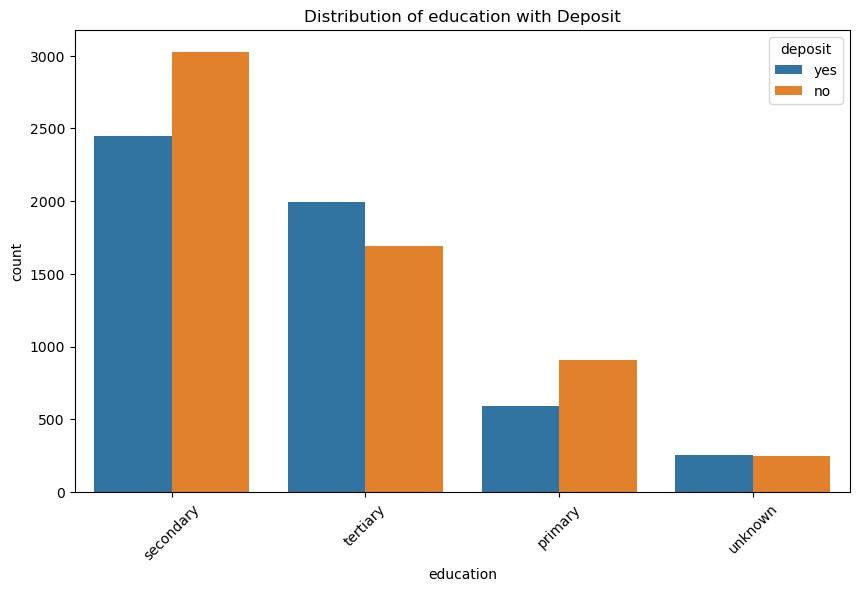

C:\Users\MANOJ S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


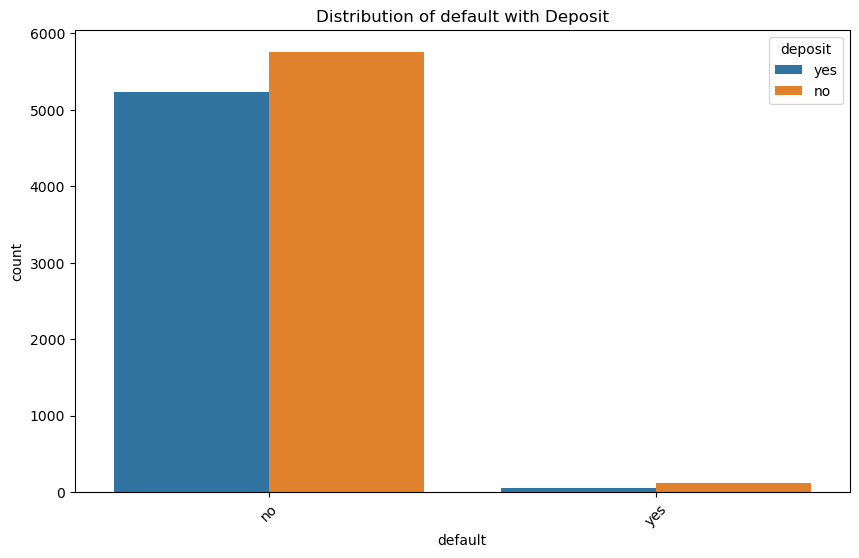

C:\Users\MANOJ S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


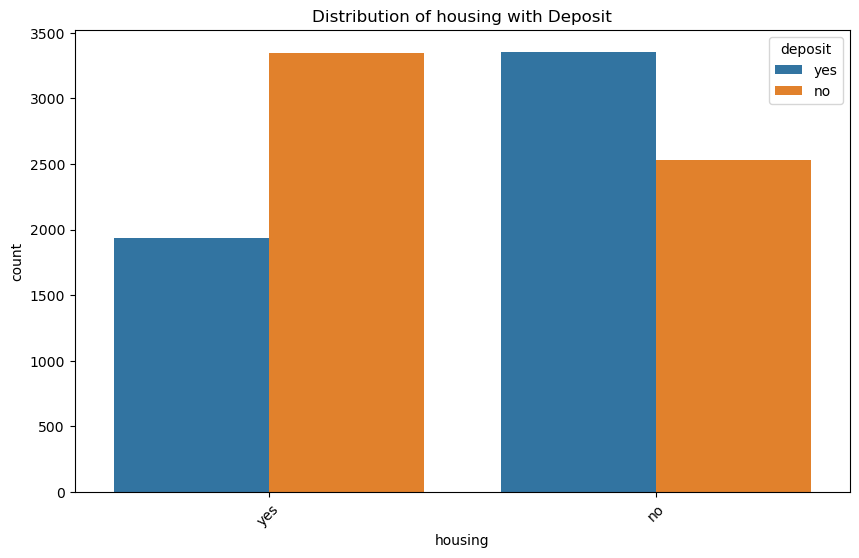

C:\Users\MANOJ S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


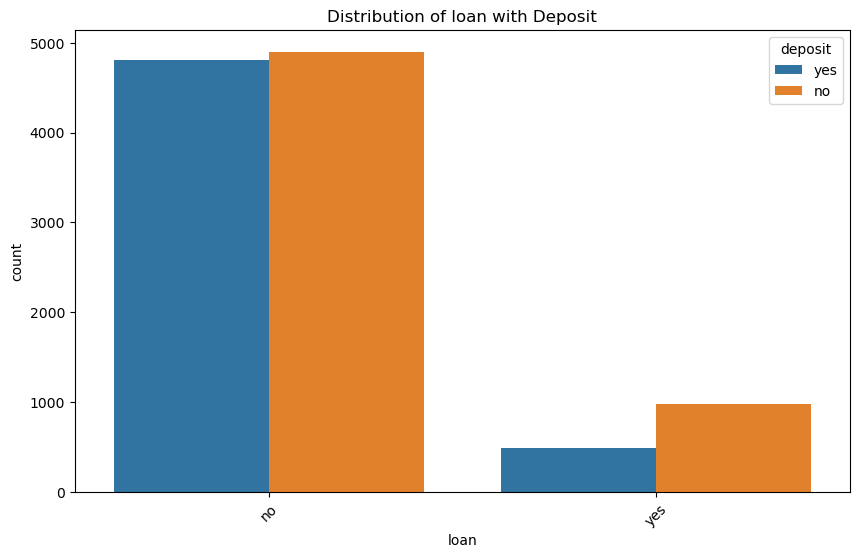

C:\Users\MANOJ S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


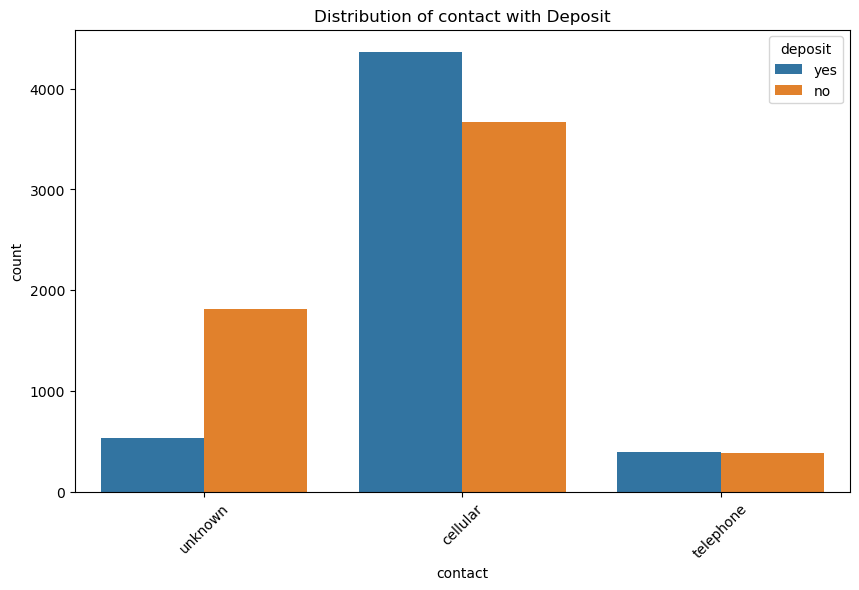

C:\Users\MANOJ S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


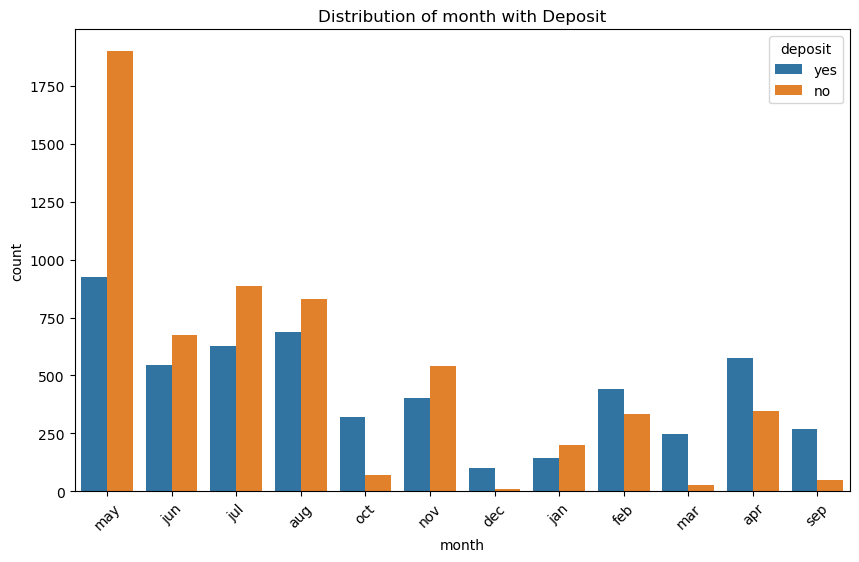

C:\Users\MANOJ S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


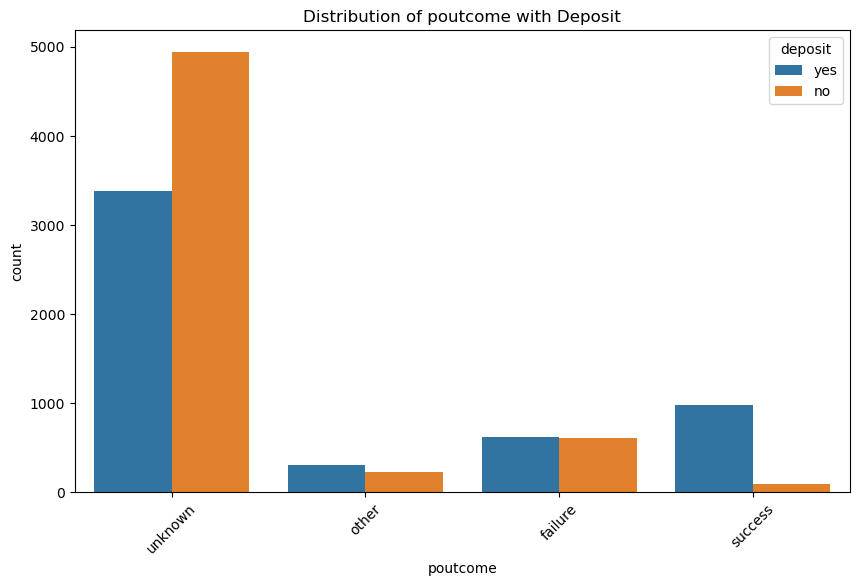

C:\Users\MANOJ S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


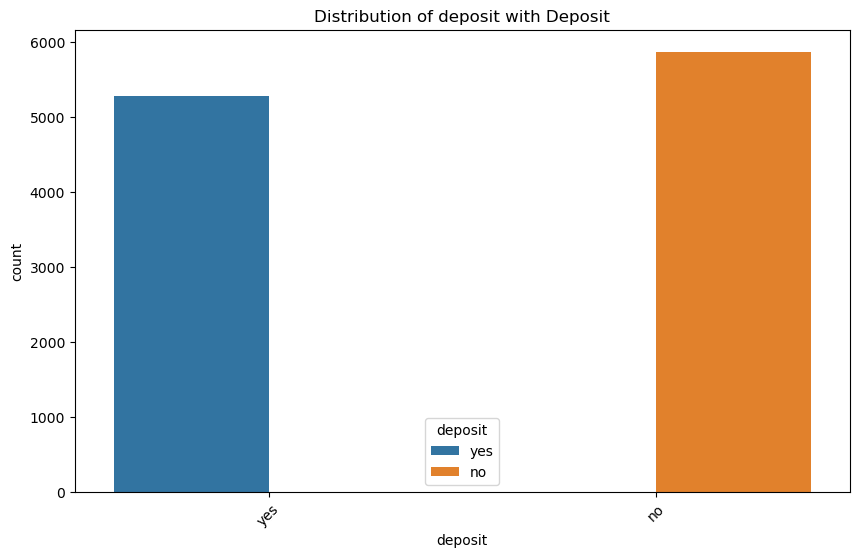

In [10]:
# Explore categorical variables
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[col], hue=data['deposit'])
    plt.title(f'Distribution of {col} with Deposit')
    plt.xticks(rotation=45)
    plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
# Define features and target variable
X = data.drop('deposit', axis=1)
y = data['deposit']

In [13]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [16]:
# Fit the classifier to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
# Predictions
y_pred = clf.predict(X_test)
y_pred

array(['yes', 'yes', 'yes', ..., 'no', 'yes', 'yes'], dtype=object)

In [19]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7895208240035826

Classification Report:
               precision    recall  f1-score   support

          no       0.79      0.80      0.80      1166
         yes       0.78      0.77      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233


Confusion Matrix:
 [[938 228]
 [242 825]]


Based on the evaluation results of the decision tree classifier, here's a detailed analysis and summary:

1. **Accuracy**: The model achieved an accuracy of approximately 78.95%, indicating that it correctly predicted the purchasing decisions of customers nearly 79% of the time.

2. **Precision**: 
   - Precision for the "no" class (customers who did not make a purchase) is 79%, implying that out of all the instances predicted as "no", 79% were correctly classified.
   - Precision for the "yes" class (customers who made a purchase) is 78%, indicating that out of all the instances predicted as "yes", 78% were correctly classified.

3. **Recall**:
   - Recall for the "no" class is 80%, meaning that the model correctly identified 80% of all actual instances where customers did not make a purchase.
   - Recall for the "yes" class is 77%, indicating that the model captured 77% of all actual instances where customers made a purchase.

4. **F1-score**:
   - The F1-score, which is the harmonic mean of precision and recall, is around 80% for the "no" class and 78% for the "yes" class. This metric provides a balance between precision and recall.

5. **Confusion Matrix**:
   - The confusion matrix reveals that out of 2233 instances, the model correctly predicted 938 instances of "no" (true negatives) and 825 instances of "yes" (true positives). However, it misclassified 228 instances of "no" as "yes" (false positives) and 242 instances of "yes" as "no" (false negatives).

Overall, the decision tree classifier demonstrates reasonably good performance in predicting customer purchases based on demographic and behavioral data. However, there is room for improvement, particularly in reducing false positives and false negatives to enhance the precision and recall for both classes. Further refinement of the model through feature engineering, parameter tuning, or exploring alternative algorithms may help improve its predictive accuracy and reliability. Additionally, conducting deeper analysis into specific features that significantly influence purchasing decisions could provide valuable insights for targeted marketing strategies and customer engagement initiatives.